In [4]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[2]
Data_base_learning_v2 = main_path+open_folder[3]
Points_equipe = main_path+open_folder[3]
Teams_puissance = main_path+open_folder[5]

In [6]:
train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.0,0,2,0,3,-1,-1,-1,-1,2409,6154
1,1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,2.0,0,0,0,2,-1,-1,-1,-1,4008,3054
2,2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.0,0,1,0,1,-1,-1,-1,-1,3029,100
3,3,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,1,0,2,1,-1,-1,-1,-1,2803,2045
4,4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.0,1,0,1,1,-1,-1,-1,-1,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1714,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,1.0,1,0,1,0,1,2,0,0,6154,9319
1287,1715,2020-03-10,95,102,Valencia CF,Atalanta BC,2.0,1,2,3,4,0,4,0,0,9770,7928
1288,1716,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.0,2,0,3,0,1,0,0,0,9221,6821
1289,1717,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,1.0,2,0,2,0,2,2,0,0,9495,7276


In [7]:
df = train_csv['goalAwayTeam_FullTime']
df.unique()

array([3, 2, 1, 0, 4, 5, 9, 6, 7], dtype=int64)

In [8]:
X = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
X = X[:,1:]
Y = train_csv['score'].values
X[0]

array([  -1,   -1,   -1,   -1, 2409, 6154], dtype=int64)

In [9]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)

(1032, 6) (1032,)


In [10]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [11]:
# for row in y_train:
#      print(row)

In [12]:
x_train

array([[    0,     1,     0,     0, 13105,  4803],
       [    0,     1,     0,     0,  2803,   100],
       [    8,     0,     0,     2,  5188,  1880],
       ...,
       [   -1,    -1,    -1,    -1,   316,   244],
       [    0,     0,     1,     0,  4059,  3267],
       [    1,     0,     0,     1,  2705,  1880]], dtype=int64)

In [13]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [14]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 69,635
Trainable params: 69,635
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=60,epochs=200)

Train on 1032 samples, validate on 259 samples
Epoch 1/200
1032/1032 [==============================] - 1s 861us/sample - loss: 447.4087 - accuracy: 0.4099 - val_loss: 239.1951 - val_accuracy: 0.4595
Epoch 2/200
1032/1032 [==============================] - 0s 67us/sample - loss: 157.5052 - accuracy: 0.4012 - val_loss: 170.0337 - val_accuracy: 0.5405
Epoch 3/200
1032/1032 [==============================] - 0s 65us/sample - loss: 111.3856 - accuracy: 0.4050 - val_loss: 72.7331 - val_accuracy: 0.4633
Epoch 4/200
1032/1032 [==============================] - 0s 65us/sample - loss: 72.7029 - accuracy: 0.4070 - val_loss: 65.0243 - val_accuracy: 0.4749
Epoch 5/200
1032/1032 [==============================] - 0s 65us/sample - loss: 62.4702 - accuracy: 0.3992 - val_loss: 73.7380 - val_accuracy: 0.2471
Epoch 6/200
1032/1032 [==============================] - 0s 64us/sample - loss: 54.3087 - accuracy: 0.3692 - val_loss: 38.2196 - val_accuracy: 0.3938
Epoch 7/200
1032/1032 [========================

Epoch 55/200
1032/1032 [==============================] - 0s 48us/sample - loss: 28.0980 - accuracy: 0.4225 - val_loss: 30.9465 - val_accuracy: 0.2896
Epoch 56/200
1032/1032 [==============================] - 0s 44us/sample - loss: 23.9737 - accuracy: 0.3905 - val_loss: 22.6934 - val_accuracy: 0.5367
Epoch 57/200
1032/1032 [==============================] - 0s 46us/sample - loss: 13.8238 - accuracy: 0.4176 - val_loss: 23.2671 - val_accuracy: 0.3166
Epoch 58/200
1032/1032 [==============================] - 0s 47us/sample - loss: 22.0317 - accuracy: 0.4254 - val_loss: 11.3752 - val_accuracy: 0.5290
Epoch 59/200
1032/1032 [==============================] - 0s 46us/sample - loss: 13.6989 - accuracy: 0.4360 - val_loss: 23.3677 - val_accuracy: 0.4517
Epoch 60/200
1032/1032 [==============================] - 0s 50us/sample - loss: 19.8626 - accuracy: 0.4360 - val_loss: 19.9858 - val_accuracy: 0.3977
Epoch 61/200
1032/1032 [==============================] - 0s 47us/sample - loss: 28.6290 - acc

1032/1032 [==============================] - 0s 45us/sample - loss: 9.7198 - accuracy: 0.4196 - val_loss: 12.7681 - val_accuracy: 0.5019
Epoch 110/200
1032/1032 [==============================] - 0s 63us/sample - loss: 9.1752 - accuracy: 0.4118 - val_loss: 22.1800 - val_accuracy: 0.2934
Epoch 111/200
1032/1032 [==============================] - 0s 66us/sample - loss: 17.2613 - accuracy: 0.3828 - val_loss: 15.1053 - val_accuracy: 0.5367
Epoch 112/200
1032/1032 [==============================] - 0s 54us/sample - loss: 13.0889 - accuracy: 0.4225 - val_loss: 8.1552 - val_accuracy: 0.4981
Epoch 113/200
1032/1032 [==============================] - 0s 55us/sample - loss: 9.0615 - accuracy: 0.4428 - val_loss: 9.0802 - val_accuracy: 0.5212
Epoch 114/200
1032/1032 [==============================] - 0s 61us/sample - loss: 7.7497 - accuracy: 0.3992 - val_loss: 6.9765 - val_accuracy: 0.3243
Epoch 115/200
1032/1032 [==============================] - 0s 59us/sample - loss: 9.0130 - accuracy: 0.4331 -

1032/1032 [==============================] - 0s 51us/sample - loss: 7.0062 - accuracy: 0.3992 - val_loss: 4.0418 - val_accuracy: 0.4440
Epoch 164/200
1032/1032 [==============================] - 0s 48us/sample - loss: 5.5068 - accuracy: 0.4225 - val_loss: 4.4273 - val_accuracy: 0.2587
Epoch 165/200
1032/1032 [==============================] - 0s 54us/sample - loss: 3.6269 - accuracy: 0.4264 - val_loss: 5.0352 - val_accuracy: 0.4170
Epoch 166/200
1032/1032 [==============================] - 0s 46us/sample - loss: 4.3852 - accuracy: 0.4438 - val_loss: 7.4418 - val_accuracy: 0.4672
Epoch 167/200
1032/1032 [==============================] - 0s 43us/sample - loss: 6.4186 - accuracy: 0.4089 - val_loss: 15.5582 - val_accuracy: 0.2934
Epoch 168/200
1032/1032 [==============================] - 0s 60us/sample - loss: 8.9907 - accuracy: 0.4390 - val_loss: 8.7025 - val_accuracy: 0.3127
Epoch 169/200
1032/1032 [==============================] - 0s 59us/sample - loss: 6.3434 - accuracy: 0.4273 - val

Text(0, 0.5, 'Accuracy')

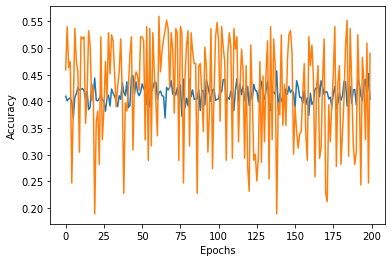

In [16]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [17]:
predictions = model.predict((x_test, y_test))

In [18]:
print(x_test[98])
print(y_test[98])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[98])
np.argmax(predictions[98])

[    0     5     2     0  4146 14695]
2
[1.97279693e-11 1.11337955e-04 9.99888659e-01]


2

# Prédiction Unique

In [19]:
unique = train_csv.values
results = []
equal = []
victory = []
loss = []
i = 0

In [20]:
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[11]
    win_cons_away = i[12]
    lose_cons_home = i[13]
    lose_cons_away= i[14]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]*100
    victoire = predictions1[0][1]*100
    perte = predictions1[0][2]*100
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire , perte ,puissance_homeTeam,puissance_awayTeam)

2 0.02533145889174193 11.86763122677803 88.10704350471497 2409 6154
1 0.3422235604375601 93.56456995010376 6.0932159423828125 4008 3054
2 5.992588028311729 5.6994520127773285 88.30795884132385 3029 100
1 2.6152843609452248 81.4573585987091 15.927363932132721 2803 2045
1 7.125280797481537 67.25069284439087 25.624018907546997 2156 1065
1 1.3207238167524338 87.31479048728943 11.364484578371048 2690 2298
2 0.015742149844300002 10.858625173568726 89.1256332397461 100 3749
1 0.40603228844702244 92.70333647727966 6.890635192394257 4207 3029
1 1.0948408395051956 87.23743557929993 11.667720228433609 3627 1736
1 0.0007177036422945093 97.24288582801819 2.7563922107219696 9495 2020
1 0.02030369796557352 98.67847561836243 1.3012136332690716 6154 2690
1 0.023558817338198423 92.2372579574585 7.739175111055374 3029 4008
1 0.19297993276268244 86.10516786575317 13.701854646205902 2298 3029
2 17.849674820899963 31.74540102481842 50.404924154281616 1065 100
1 0.24777369108051062 87.90583610534668 11.84639

1 0.4701103549450636 94.34453248977661 5.185360461473465 3054 2690
2 8.556868135929108 12.773178517818451 78.66995334625244 2409 100
1 1.4028601348400116 87.821364402771 10.775768756866455 3627 2020
2 0.9333126246929169 34.953826665878296 64.11285996437073 100 2045
1 2.6489133015275 51.93648338317871 45.41460871696472 3029 1065
1 0.03724262351170182 94.8458731174469 5.116880312561989 3029 3749
1 0.0003344560354889836 96.76991105079651 3.2297544181346893 4008 6154
1 0.00018591292700875783 99.89504218101501 0.10477314935997128 9495 4207
1 0.0234343227930367 98.66967797279358 1.3068878091871738 6154 2803
1 0.18670889548957348 83.56452584266663 16.24877005815506 2156 3029
1 2.4084987118840218 81.15338087081909 16.4381206035614 2690 2020
0 36.93048059940338 33.93738567829132 29.132133722305298 100 100
1 1.3535712845623493 68.36857795715332 30.27784824371338 1736 3054
1 0.554805900901556 77.99195647239685 21.453242003917694 2045 3627
1 1.3456456363201141 83.98756384849548 14.666792750358582 

1 0.43317852541804314 80.81688284873962 18.749941885471344 2020 2690
1 0.050102907698601484 97.32364416122437 2.626252733170986 6154 3627
1 0.43378621339797974 64.43735361099243 35.12886464595795 2156 3749
2 6.150075793266296 6.883001327514648 86.96691989898682 3054 100
1 0.046284717973321676 98.72797727584839 1.2257319875061512 4207 4008
1 1.552820298820734 88.92902135848999 9.518157690763474 2803 2156
2 0.004087830166099593 1.4691881835460663 98.52672815322876 1736 6154
1 0.3147575072944164 96.77246809005737 2.9127847403287888 4008 3029
2 0.8113173767924309 44.026803970336914 55.1618754863739 4207 1065
1 0.26883913669735193 93.12406182289124 6.60710409283638 2690 3029
2 0.36445518489927053 32.150208950042725 67.48533248901367 100 2409
1 1.4918893575668335 84.8706305027008 13.637486100196838 3627 2045
1 0.16961944056674838 98.3012855052948 1.5290942043066025 3749 3054
2 0.8655460551381111 43.38245093822479 55.75200319290161 100 2020
1 0.0018158860257244669 90.82202315330505 9.17615517

1 0.06229159771464765 97.93542623519897 2.0022811368107796 5188 3781
1 3.095182403922081 74.65378642082214 22.251027822494507 2482 1880
2 0.00014675641750727664 8.032916486263275 91.96693897247314 4146 10390
2 1.812175520754522e-07 42.03425943851471 57.96574354171753 7151 14695
2 0.001827910091378726 40.41265547275543 59.585511684417725 3883 7938
1 0.06116431322880089 81.87372088432312 18.065109848976135 2956 5188
1 1.0195174837690502e-05 99.78529214859009 0.21470070350915194 10390 1553
1 0.021997051953803748 95.65081596374512 4.327194020152092 2705 3883
1 0.05307288374751806 88.21367621421814 11.733248829841614 2512 3982
1 0.8643587119877338 90.90850949287415 8.227130770683289 2817 2482
2 0.0013323536222742405 18.920661509037018 81.07801079750061 3781 8832
1 0.0042340561776654795 69.6483314037323 30.347439646720886 3890 7311
1 1.1120308007761537e-07 99.99607801437378 0.003918337824870832 14695 6821
1 0.0044395088480087 98.93446564674377 1.0610929690301418 7938 4146
2 0.000504327408634

1 0.9291393682360649 92.50617623329163 6.564682722091675 2705 2482
1 4.361857577350747e-05 99.94682669639587 0.05312426947057247 7938 7151
1 1.0767477931494795e-05 95.15920877456665 4.840779677033424 14695 3883
1 0.5391092505306005 94.60192322731018 4.858971014618874 3883 2705
1 0.001492086175858276 50.60165524482727 49.39685761928558 4146 7938
1 0.012701735249720514 97.71526455879211 2.2720366716384888 7311 3890
1 0.0005922345735598356 99.36540126800537 0.6340092048048973 8832 3781
1 0.9265229105949402 91.02702140808105 8.046451210975647 3982 2512
1 0.04414068243931979 69.98602747917175 29.969829320907593 7151 1880
1 0.1983289374038577 95.65145969390869 4.15022075176239 5188 2956
2 2.1460193622147017e-07 27.432364225387573 72.56763577461243 6821 14695
1 0.32584082800894976 88.77259492874146 10.901573300361633 2482 2817
2 5.0907982690473474e-09 0.10420324979349971 99.89579916000366 1553 10390
2 0.022589876607526094 18.38591694831848 81.59149289131165 2817 6821
1 3.958192564823548e-05 9

2 0.0038353391573764384 41.49044454097748 58.50571393966675 3663 7447
1 0.005495619916473515 91.96448922157288 8.030018210411072 4059 4803
1 0.1581394113600254 97.02321887016296 2.818644233047962 4059 3267
1 0.001941368100233376 75.5220890045166 24.475960433483124 4257 7881
1 0.01452652650186792 92.35674738883972 7.628729939460754 3267 4257
1 0.03906440979335457 98.42878580093384 1.5321510843932629 5396 4059
1 0.04593537014443427 97.62835502624512 2.3257123306393623 4554 3861
1 0.000250048333327868 99.769127368927 0.23062382824718952 9329 4059
2 1.5593517588285977e-06 7.436280697584152 92.56371259689331 4803 13105
1 0.019128568237647414 67.67179369926453 32.30907917022705 7881 2475
1 2.175392239678331e-05 98.3109176158905 1.689058355987072 6273 7427
2 0.03615595633164048 0.005479429091792554 99.95836615562439 9770 100
1 0.07864486542530358 95.35102844238281 4.570323973894119 6139 3663
1 9.396686095897167e-07 99.17160868644714 0.8283901028335094 7447 8949
1 0.0040766928577795625 94.0257

2 3.9274893701076508 3.9513248950242996 92.12118983268738 3663 100
1 0.022393254039343446 98.26509356498718 1.7125073820352554 4803 4554
1 3.842445472912459e-07 98.2242226600647 1.7757710069417953 7427 13105
1 0.0829314230941236 93.0633544921875 6.853713095188141 6139 3861
1 0.0015914582036202773 94.93643641471863 5.061965435743332 9329 3267
1 0.00426621591032017 99.31858777999878 0.6771472748368979 7881 4059
1 1.0611611418426037 81.8842887878418 17.05455780029297 4059 2475
1 0.019919291662517935 98.77697825431824 1.2030991725623608 6273 4257
1 0.002909920658566989 99.46212768554688 0.5349678453058004 7447 5396
1 1.1683855660749032e-06 99.99358654022217 0.006416662654373795 9770 8949
1 2.7059689600150705e-06 99.97671246528625 0.023290324315894395 13105 8949
1 0.005520110426004976 91.77213311195374 8.222341537475586 3861 4803
2 0.0013114958164806012 6.498619914054871 93.50006580352783 2475 7447
1 0.00010447079148434568 60.20500063896179 39.79489505290985 13105 3663
1 3.845597262852607e-

2 0.10209032334387302 0.02272791607538238 99.87517595291138 9319 100
1 0.0004295548023947049 99.84788298606873 0.1516927732154727 6846 6735
2 5.13535849750042 6.455270946025848 88.4093701839447 3100 100
1 0.002267634408781305 99.49134588241577 0.5063906311988831 7928 3817
2 8.951342920227034e-05 2.448759414255619 97.55115509033203 2866 9035
1 0.38591937627643347 79.76001501083374 19.854064285755157 1932 2679
1 0.63529247418046 92.68829822540283 6.6764093935489655 3086 2588
1 0.9413867257535458 81.21803402900696 17.84057915210724 1781 2280
2 3.0439184683928033e-05 0.5195440258830786 99.48042035102844 2679 9319
2 0.30853014905005693 43.240147829055786 56.45131468772888 100 2588
1 0.0037680631066905335 90.47998189926147 9.516260027885437 9035 3100
2 8.750018878345145e-05 0.4841925576329231 99.51571822166443 1932 7928
2 0.15010337810963392 32.685598731040955 67.16429591178894 100 2866
2 18.000797927379608 35.980674624443054 46.018531918525696 1140 100
2 0.005038771632825956 13.149888813495

1 0.009882081212708727 99.47466254234314 0.5154597572982311 6846 3100
2 0.0027986703571514226 10.936634987592697 89.06056880950928 100 4490
0 41.43727719783783 27.472084760665894 31.090635061264038 100 100
2 0.005121666254126467 12.04577088356018 87.94910907745361 2280 6735
1 0.6743640638887882 91.68919920921326 7.636446505784988 2866 2588
1 0.0001199368398374645 99.94481205940247 0.055062928004190326 9035 6735
1 0.023151945788413286 60.1951003074646 39.78174924850464 7928 2280
2 5.466096475720406 5.704667046666145 88.82923126220703 3100 100
1 1.5802753550175908e-07 99.91480112075806 0.08520294213667512 6846 9319
1 3.0788881704211235 72.69816994667053 24.222944676876068 1781 1932
1 0.82510681822896 85.44756770133972 13.727331161499023 3817 2679
1 0.4366458859294653 93.44652891159058 6.116826459765434 3086 2866
2 5.584016442298889 39.367303252220154 55.04868030548096 2242 1140
2 7.206515967845917 8.946950733661652 83.84653925895691 2588 100
2 0.0028887150619993918 12.173891812562943 87.

1 2.0109865814447403 68.5070812702179 29.481926560401917 3086 1140
2 0.03602738433983177 21.211539208889008 78.75242829322815 100 3507
0 41.43727719783783 27.472084760665894 31.090635061264038 100 100
2 0.03633093147072941 23.196062445640564 76.7676055431366 100 3507
2 0.013575538469012827 2.158833295106888 97.82758951187134 1092 4858
2 35.8191043138504 27.273371815681458 36.90751791000366 423 100
0 41.22245013713837 24.414286017417908 34.36326086521149 178 100
2 32.42444694042206 31.670355796813965 35.905200242996216 498 74
2 6.81438280025759e-05 1.1070397682487965 98.89288544654846 63 5551
2 29.940500855445862 33.41268002986908 36.64681911468506 603 100
1 24.215756356716156 38.55060636997223 37.233638763427734 832 136
2 31.40799105167389 24.33677464723587 44.25523579120636 100 100
2 6.714659929275513 20.140646398067474 73.1446921825409 119 1054
0 36.69463098049164 28.689223527908325 34.6161425113678 316 244
2 6.729345768690109 28.63057553768158 64.64008092880249 890 2030
2 0.73991189

1 3.292033667889882e-06 99.98687505722046 0.013119007053319365 9770 8164
2 0.3825847990810871 34.4886839389801 65.1287317276001 100 2478
1 6.1777058135703555e-06 99.96219873428345 0.03778531972784549 9329 8083
2 0.0013601925274997484 12.198898196220398 87.79974579811096 3647 8949
1 1.9470143275412966e-07 99.3395745754242 0.6604297086596489 8036 9495
2 0.41128890588879585 0.1661247108131647 99.42259192466736 6821 100
1 1.5500278394142697e-06 98.49873185157776 1.5012716874480247 6497 10885
1 1.1857865445108473e-05 99.97307658195496 0.026914020418189466 10390 7928
2 0.2319728722795844 0.09686405537649989 99.67116117477417 9319 100
1 0.00039808992369216867 99.79678988456726 0.20281809847801924 9221 6351
1 2.994882564166801e-06 99.8761534690857 0.12385314330458641 8164 8832
0 39.8312121629715 32.365596294403076 27.80318856239319 100 100
2 1.9806309641424297e-11 0.005341996438801289 99.99465942382812 2929 14695
1 3.048010626116593e-05 99.95749592781067 0.04246781172696501 9035 7276
2 1.78807

In [21]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [22]:
predictions1[0]

array([1.0436811e-08, 9.9985611e-01, 1.4383104e-04], dtype=float32)

In [23]:
result

1

In [24]:
df = {'date':train_csv.date,'id_HomeTeam':train_csv.idHomeTeam,'id_AwayTeam':train_csv.idAwayTeam,'homeTeam':train_csv.homeTeam,'AwayTeam':train_csv.awayTeam,'prediction_egalité':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}

In [25]:
d = pd.DataFrame(df)

In [26]:
d

,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.533146e-02,11.867631,88.107044,2
1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,3.422236e-01,93.564570,6.093216,1
2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,5.992588e+00,5.699452,88.307959,2
3,2019-08-10,522,530,OGC Nice,Amiens SC,2.615284e+00,81.457359,15.927364,1
4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,7.125281e+00,67.250693,25.624019,1
...,...,...,...,...,...,...,...,...,...
1286,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,4.043364e-07,99.540085,0.459913,1
1287,2020-03-10,95,102,Valencia CF,Atalanta BC,5.014018e-06,99.975771,0.024235,1
1288,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.402019e-04,99.903983,0.095873,1
1289,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,3.444446e-05,99.958032,0.041936,1


In [27]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')